In [12]:
import snowflake.connector
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import yaml

In [13]:
yaml_path = r"C:\Users\Paul Tandazo\Desktop\PSET1-datamining\tuberias-deber\io_config.yaml"
with open(yaml_path, "r") as file:
    config = yaml.safe_load(file)
sf_config = config.get("default", {})

In [14]:
# Conectar a Snowflake
conn = snowflake.connector.connect(
    user=sf_config["SNOWFLAKE_USER"],
    password=sf_config["SNOWFLAKE_PASSWORD"],
    account=sf_config["SNOWFLAKE_ACCOUNT"],
    warehouse=sf_config["SNOWFLAKE_DEFAULT_WH"],
    database="INSTACART_DB",
    schema="RAW",
    role=sf_config["SNOWFLAKE_ROLE"]
)

cur = conn.cursor()
cur.execute("SELECT CURRENT_VERSION()")
print("Conectado a Snowflake - Versión:", cur.fetchone()[0])

Conectado a Snowflake - Versión: 9.2.8


In [15]:
cur = conn.cursor()
cur.execute("SHOW TABLES IN SCHEMA RAW")
tables = cur.fetchall()

#Imprimir el nombre de las tablas disponibles en "RAW" 
for table in tables:
    print(table[1])


AISLES
DEPARTMENT
INSTACART_ORDERS
ORDER_PRODUCTS
PRODUCTS


In [33]:
table_name = 'ORDER_PRODUCTS' #Aquí solo hay que cambiar el nombre de la tabla que se requiera inspeccionar
query_count = f"SELECT COUNT(*) FROM {table_name}"
num_rows = pd.read_sql_query(query_count, conn).iloc[0, 0]

# Consulta para obtener las columnas sin cargar toda la data
query_columns = f"SELECT * FROM {table_name} LIMIT 1"
df_sample = pd.read_sql_query(query_columns, conn)
num_columns = df_sample.shape[1]
print(f"Dimensiones de la tabla {table_name}: {num_rows} filas, {num_columns} columnas")

C:\Users\Paul Tandazo\AppData\Local\Temp\ipykernel_9300\1282710151.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  num_rows = pd.read_sql_query(query_count, conn).iloc[0, 0]
C:\Users\Paul Tandazo\AppData\Local\Temp\ipykernel_9300\1282710151.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sample = pd.read_sql_query(query_columns, conn)


Dimensiones de la tabla ORDER_PRODUCTS: 4545007 filas, 4 columnas


In [34]:
query = f"SELECT * FROM {table_name}"
df = pd.read_sql(query, conn)

# Ver las dimensiones del DataFrame
print(f"Dimensiones de la tabla {table_name}: {df.shape}")

# Ver estadísticos descriptivos de todas las columnas numéricas
print("Estadísticos descriptivos:")
print(df.describe())

# Verificar si hay muchas filas y valores únicos
print("\nCantidad de valores únicos por columna:")
print(df.nunique())

# Verificar si los valores mínimos y máximos están bien calculados
print("\nValores mínimos por columna:")
print(df.min(numeric_only=True))

print("\nValores máximos por columna:")
print(df.max(numeric_only=True))


C:\Users\Paul Tandazo\AppData\Local\Temp\ipykernel_9300\4195236253.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Dimensiones de la tabla ORDER_PRODUCTS: (4545007, 4)
Estadísticos descriptivos:
           order_id    product_id  add_to_cart_order     reordered
count  4.545007e+06  4.545007e+06       4.544171e+06  4.545007e+06
mean   1.711166e+06  2.558084e+04       8.351669e+00  5.905025e-01
std    9.850955e+05  1.409552e+04       7.080368e+00  4.917411e-01
min    4.000000e+00  1.000000e+00       1.000000e+00  0.000000e+00
25%    8.608170e+05  1.353500e+04       3.000000e+00  0.000000e+00
50%    1.711530e+06  2.527200e+04       6.000000e+00  1.000000e+00
75%    2.561311e+06  3.793500e+04       1.100000e+01  1.000000e+00
max    3.421079e+06  4.969400e+04       6.400000e+01  1.000000e+00

Cantidad de valores únicos por columna:
order_id             450046
product_id            45573
add_to_cart_order        64
reordered                 2
dtype: int64

Valores mínimos por columna:
order_id             4.0
product_id           1.0
add_to_cart_order    1.0
reordered            0.0
dtype: float64

Valor

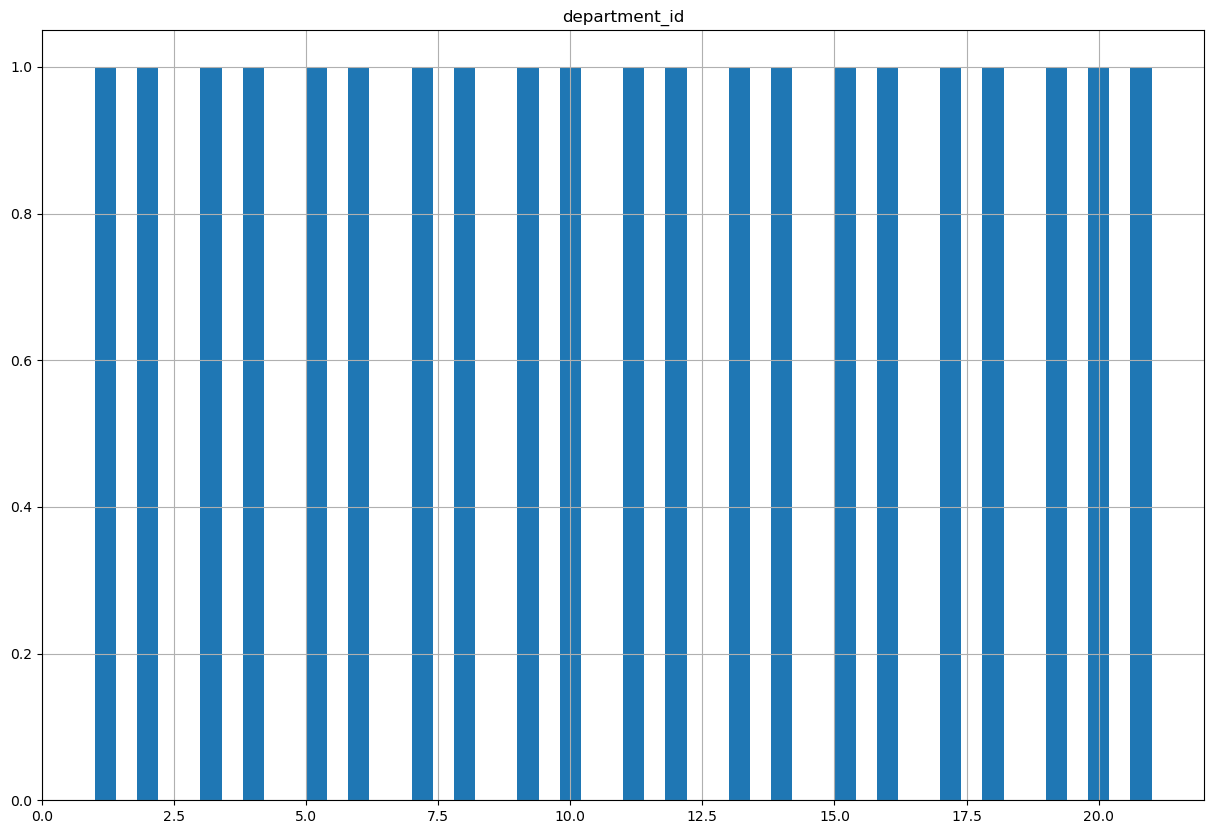

In [14]:
#Distribución
df.hist(bins=50, figsize=(15, 10))
plt.show()

#sns.histplot(df['product_id'], kde=True)
#plt.show()

In [35]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
print(pd.DataFrame({'Valores Nulos': missing_values, 'Porcentaje': missing_percent}))

                   Valores Nulos  Porcentaje
order_id                       0    0.000000
product_id                     0    0.000000
add_to_cart_order            836    0.018394
reordered                      0    0.000000


In [36]:
# Contar registros duplicados
print("Cantidad de registros duplicados:", df.duplicated().sum())

# Mostrar solo los registros duplicados
df_duplicados = df[df.duplicated(keep=False)]
print("\nRegistros duplicados:")
print(df_duplicados)

# Eliminar duplicados (opcional)
df_sin_duplicados = df.drop_duplicates()

Cantidad de registros duplicados: 0

Registros duplicados:
Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [31]:
# Mostrar tipos de datos
print("Tipos de datos por columna:")
print(df.dtypes)

# Verificar si hay valores no numéricos en columnas numéricas
for col in df.select_dtypes(include=['number']).columns:
    if df[col].apply(lambda x: isinstance(x, (int, float))).all():
        continue
    else:
        print(f"\nPosibles valores inconsistentes en '{col}':")
        print(df[~df[col].apply(lambda x: isinstance(x, (int, float)))][col])


Tipos de datos por columna:
order_id                    int64
user_id                     int64
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object



Valores atípicos en 'order_id': 0 registros

Valores atípicos en 'product_id': 0 registros

Valores atípicos en 'add_to_cart_order': 190971 registros
         add_to_cart_order
4                     24.0
9                     34.0
19                    36.0
35                    33.0
86                    25.0
...                    ...
4544925               32.0
4544926               25.0
4544955               45.0
4544986               24.0
4545001               29.0

[190971 rows x 1 columns]

Valores atípicos en 'reordered': 0 registros


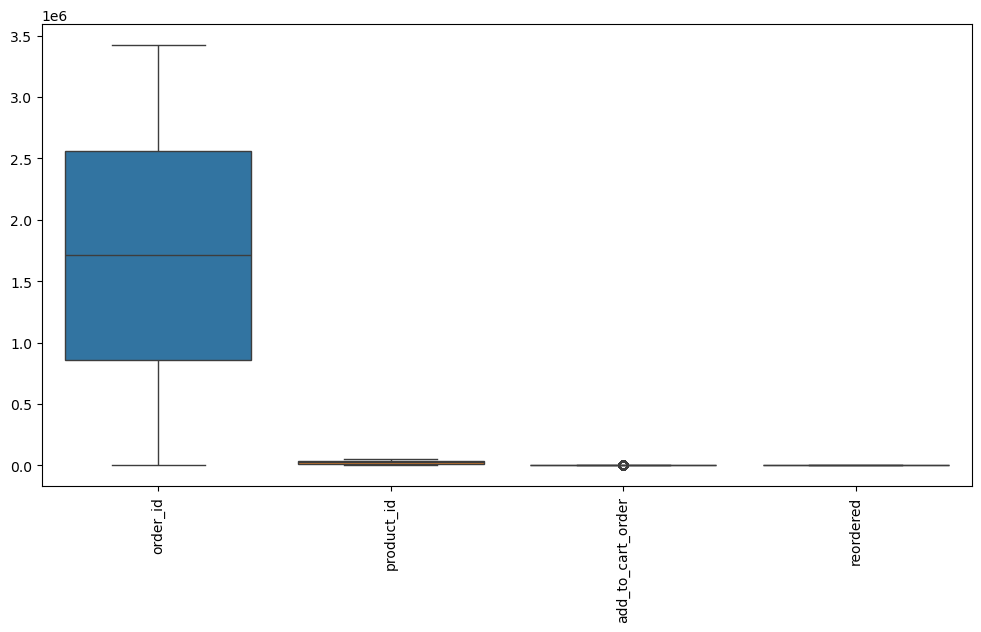

In [37]:
import matplotlib.pyplot as plt

# Definir umbrales de valores atípicos usando el rango intercuartílico (IQR)
def detectar_atipicos(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    atipicos = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return atipicos

# Aplicar a todas las columnas numéricas
for col in df.select_dtypes(include=['number']).columns:
    atipicos = detectar_atipicos(df, col)
    print(f"\nValores atípicos en '{col}': {len(atipicos)} registros")
    if not atipicos.empty:
        print(atipicos[[col]])

# Visualización de outliers con boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.show()